In [2]:
pip install face-recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=46d042c45a64de841a9fcf2b97d456c012c5bb4c637c4dbdd91d66c101db417e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


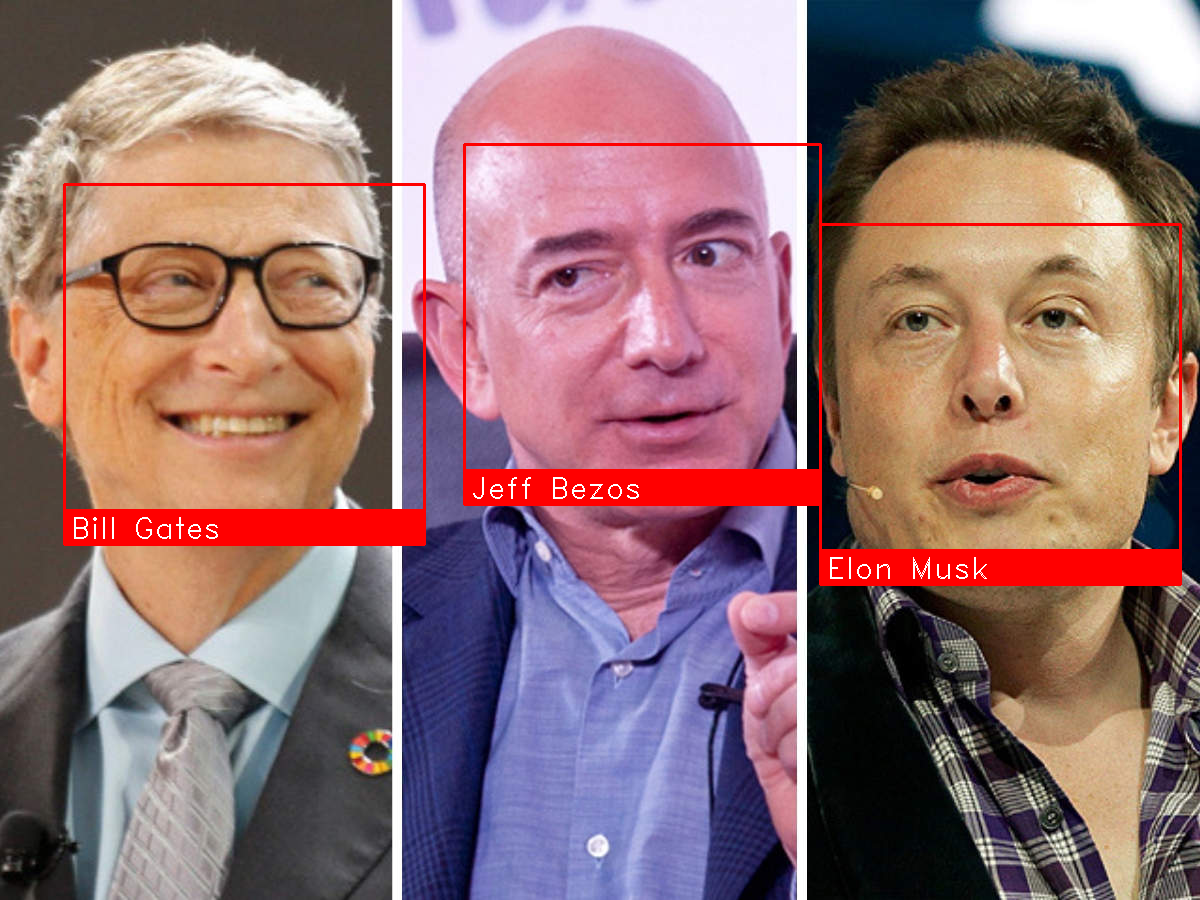

In [4]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

video_capture = cv2.imread("B_J_E.jpg")

elon_image = face_recognition.load_image_file("elon.jpg")
elon_face_encoding = face_recognition.face_encodings(elon_image)[0]

bill_image = face_recognition.load_image_file("bill.jpg")
bill_face_encoding = face_recognition.face_encodings(bill_image)[0]

jeff_image = face_recognition.load_image_file("jeff.jpg")
jeff_face_encoding = face_recognition.face_encodings(jeff_image)[0]

known_face_encodings = [
    elon_face_encoding,
    jeff_face_encoding,
    bill_face_encoding
]
known_face_names = [
    "Elon Musk",
    "Jeff Bezos",
    "Bill Gates"
]

face_locations = []
face_encodings = []
face_names = []
process_this_frame = True


frame = cv2.imread("B_J_E.jpg")
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
rgb_small_frame = small_frame[:, :, ::-1]
if process_this_frame:
  face_locations = face_recognition.face_locations(rgb_small_frame)
  face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
  face_names = []
  for face_encoding in face_encodings:
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
      name = "Unknown"
      face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)
      if matches[best_match_index]:
        name = known_face_names[best_match_index]
        face_names.append(name)
  process_this_frame = not process_this_frame
  for (top, right, bottom, left), name in zip(face_locations, face_names):
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
  cv2_imshow(frame)
cv2.destroyAllWindows()

In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

video_capture = cv2.VideoCapture("B.mp4")
#Loading the training set
jack_image = face_recognition.load_image_file("jack.jpg")
jack_face_encoding = face_recognition.face_encodings(jack_image)[0]

elon_image = face_recognition.load_image_file("elon.jpg")
elon_face_encoding = face_recognition.face_encodings(elon_image)[0]

ratan_image = face_recognition.load_image_file("ratan.jpg")
ratan_face_encoding = face_recognition.face_encodings(ratan_image)[0]

kevin_image = face_recognition.load_image_file("Kevin.jpg")
kevin_face_encoding = face_recognition.face_encodings(kevin_image)[0]

bill_image = face_recognition.load_image_file("bill.jpg")
bill_face_encoding = face_recognition.face_encodings(bill_image)[0]

jeff_image = face_recognition.load_image_file("jeff.jpg")
jeff_face_encoding = face_recognition.face_encodings(jeff_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    jack_face_encoding,
    elon_face_encoding,
    ratan_face_encoding,
    kevin_face_encoding
]
known_face_names = [
    "Jack Ma",
    "Elon Musk",
    "Ratan Tata",
    "Kevin O'Leary"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    ret, frame = video_capture.read()

    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    rgb_small_frame = small_frame[:, :, ::-1]

    if process_this_frame:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.